# 교차분석, 카이제곱검정, 추정과 검정(단일 집단 검정)

- 교차분석
  - 범주형 자료(명목척도, 서열척도)를 대상으로 두 개 이상의 변수들에 대한 관련성을 알아보기 위해서 결합분포를 나타내는 교차 분할표를 작성하고 이를 통해서 변수 상호간의 관련성 여부를 분석하는 방법이다. 
  - 빈도분석의 특성별 차이를 분석하기 위해 수행하는 분석 방법으로 빈도분석 결과에 대한 보충자료를 제시하는 데 효과적이다.
  - 교차분석은 빈도분석과 함께 고급통계분석의 기초정보를 제공한다.
  - 주의 1) 교차분석에 사용되는 변수는 값이 10 미만인 범주형 변수(명목척도, 서열척도)이어야 한다.
  - 주의 2) 비율척도인 경우는 코딩 변경을 통해서 범주형 자료로 변화해야 한다. 
    - 예를 들면, 나이의 경우 10~19세는 1, 20~29세는 2 등으로 코딩변경을 통해 범주화하여 사용한다.

---

- 데이터프레임 생성
  - 해당 변수를 확인하여 모델링한 후 범주형 데이터로 변환하는 변수 리코딩 과정을 거친다. 
  - 대상 변수를 분할표로 작성하기 위해서는 데이터프레임을 생성해야 한다. 
  - 변수 모델링 : 특정 객체를 대상으로 분석할 속성(변수)을 선택하여 속성 간의 관계를 설정하는 일련의 과정을 의미한다. 여기서 속성은 변수 또는 변인이라고도 한다. 
    - 예를 들면, smoke 객체에서 education과 smoking 속성을 분석대상으로 하여 education이 smoking과 관련성이 있는가를 모델링하는 경우 education $\to$ smoking 형태로 기술한다. 이때 education은 영향을 미치는 독립변수에 해당하고, smoking은 영향을 받는 종속변수에 해당한다. 

In [1]:
data = read.csv('cleanDescriptive.csv',header=T)
head(data,3)

,resident,gender,age,level,cost,type,survey,pass,cost2,resident2,gender2,age2,level2,pass2
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,50,1,5.1,1,1,2,2,특별시,남자,장년층,고졸,실패
2,2,1,54,2,4.2,1,2,2,2,광역시,남자,장년층,대졸,실패
3,NA,1,62,2,4.7,1,1,1,2,NA,남자,노년층,대졸,합격


In [2]:
x = data$level2
y = data$pass2

- 교차분할표 작성을 위해 데이터프레임을 생성하자

In [7]:
result = data.frame(Level = x, Pass = y)
dim(result)

[1] 248   2

In [8]:
head(result,2)

,Level,Pass
,<chr>,<chr>
1,고졸,실패
2,대졸,실패


- 부모의 학력 수준이 자녀의 대학 진학여부와 관련이 있는지를 분석하기 위해서 학력수준(독립변수)과 진학여부(종속변수) 변수를 대상으로 데이터프레임을 생성했다. 
- 교차 분할표를 통해서 범주형 변수의 관계를 분석하는 방법으로 이전에 작성한 데이터프레임을 이용하여 교차분석을 수행한다. 

In [9]:
# 기본 함수를 이용한 교차분할표 작성
table(result)

          Pass
Level      실패 합격
  고졸       40   49
  대졸       27   55
  대학원졸   23   31

- result 데이터프레임 객체를 대상으로 기보 함수인 table() 함수를 이용하여 두 개 이상 변수의 결합분포를 나타내는 교차분할표를 작성했다. 

In [10]:
install.packages('gmodels')
install.packages('ggplot2')
library(gmodels)
library(ggplot2)

also installing the dependencies 'gtools', 'gdata'




package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpUBsNIL\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpUBsNIL\downloaded_packages


In [15]:
# 패키지를 이용한 교차분할표 작성 : 부모의 학력수준과 자녀 대학 진학여부
x = data$level2
y = data$pass2
CrossTable(x,y) # 교차 분할표 작성
# Cell Contents은 교차 분할표를 이루고 있는 각 셀에 대한 데이터의 설명이다.
# 첫 번째 줄 : 관측치를 의미
# 두 번째 줄 : 카이제곱의 결과(기대치 비율)
# 세 번째 줄 : 현재 행의 비율
# 네 번째 줄 : 현재 열의 비율
# 다섯 번째 줄 : 전체비율에서 현재 셀의 값이 차지하는 비율


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  225 

 
             | y 
           x |      실패 |      합격 | Row Total | 
-------------|-----------|-----------|-----------|
        고졸 |        40 |        49 |        89 | 
             |     0.544 |     0.363 |           | 
             |     0.449 |     0.551 |     0.396 | 
             |     0.444 |     0.363 |           | 
             |     0.178 |     0.218 |           | 
-------------|-----------|-----------|-----------|
        대졸 |        27 |        55 |        82 | 
             |     1.026 |     0.684 |           | 
             |     0.329 |     0.671 |     0.364 | 
             |     0.300 |     0.407 |           | 
             |     0.120 |     0.244 |           | 
-------------|-----------|-----------|-----------|
    대학원졸

- 교차 분할표에서 기대비율은 카이제곱 식(= 시그마(관측값-기대값)^2/기대값)에 의해서 구해진 결과이다. 
- 이때 기대값은 (현재 셀의 행 합 x 현재 셀의 열 합)/전체합으로 구한다. 
- 이렇게 계산된 기대비율 6개(교차 분할표 6개 셀)의 총합과 자유도(df)라는 검정 통계량을 이용하여 두 변인 간의 관련성 여부를 검정하는 방법이 카이제곱 검정이다. 

- 논문/보고서에서 교차 분할표 해석
  - 부모의 학력 수준에 따른 자녀의 대학진학 여부를 설문 조사한 결과 부모의 학력 수준에 상관없이 대학진학 합격률이 평균 60%로 학력 수준별로 유사한 결과가 나타났다.
  - 대졸 부모의 대학진학 합격율이 평균보다 조금 높고, 고졸 부모의 대학진학 합격율이 평균보다 조금 낮은 것으로 분석된다. 

---

- 카이제곱 검정
  - 범주별로 관측빈도와 기대빈도의 차이를 통해서 확률 모형이 데이터를 얼마나 잘 설명하는지를 검정하는 통계적 방법이다.
  - 일반적으로 교차분석으로 얻어진 분할표를 대상으로 유의확률을 적용하여 변수 간의 독립성(관련성)여부를 검정하는 분석 방법으로 사용된다. 
  - 교차분석은 카이제곱 검정 통계량을 사용하기 때문에 교차 분석을 카이제곱 검정이라고도 한다.
    - 카이제곱 검정의 유형에는 적합도 검정, 독립성 검정, 동질성 검정으로 분류한다.
    - 주의 1. 카이제곱 검정은 교차분석과 동일하게 `범주형 변수`를 대상으로 한다.
    - 주의 2. 집단별로 비율이 같은지를 검정(비율에 대한 검정)하여 `독립성 여부를 검정`한다. 
    - 주의 3. 유의확률에 의해서 집단 간의 차이가 있는지 없느지를 가설 검정한다.

In [17]:
# CrossTable() 함수를 이용한 카이제곱 검정
# CrossTable() 함수에 chisq = T 속성을 통해 카이제곱 검정의 결과를 볼 수 있다. 
CrossTable(x,y,chisq=T)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  225 

 
             | y 
           x |      실패 |      합격 | Row Total | 
-------------|-----------|-----------|-----------|
        고졸 |        40 |        49 |        89 | 
             |     0.544 |     0.363 |           | 
             |     0.449 |     0.551 |     0.396 | 
             |     0.444 |     0.363 |           | 
             |     0.178 |     0.218 |           | 
-------------|-----------|-----------|-----------|
        대졸 |        27 |        55 |        82 | 
             |     1.026 |     0.684 |           | 
             |     0.329 |     0.671 |     0.364 | 
             |     0.300 |     0.407 |           | 
             |     0.120 |     0.244 |           | 
-------------|-----------|-----------|-----------|
    대학원졸

- p값이 0.05보다 작지 않다. 이는 유의확률이 유의수준보다 작지 않다는 의미로 두 변인은 서로 독립적이다(여기서 독립적이다라는 의미는 두 변인은 서로 관련성이 없다라는 의미로 해석할 수 있겠다)라는 귀무가설을 기각할 수 없다. 
- 따라서 두 변인은 서로 독립적이지 않다라는 대립가설을 채택할 수 없다.

---

- 카이제곱 검정 절차와 기본 가정
  - 카이제곱 검정은 유의수준과 유의확률 값에 의해서 가설을 검정해야 한다. 

`단계 1)` 가설을 설정한다
- 귀무가설($H_0$) : ~같다. ~다르지 않다. ~차이가 없다. ~효과가 없다.
- 대립가설($H_1$) : ~같지 않다. ~다르자. ~차이가 있다. ~효과가 있다.

`단계 2)` 유의수준($\alpha$)을 결정한다. 
- 일반 사회과학 분야 : 0.05
- 의,생명과학 분야 : 0.01

`단계 3)` 자유도(df)와 유의수준($\alpha$)에 따른 $x^2$ 분포표에 의해 기각값을 결정한다. 

`단계 4)` 관찰도수에 대한 기대도수를 구한다.

`단계 5)` 검정 통계량 $x^2$의 값을 구한다.
- $x^2=$ 시그마(관측값-기대값)^2/기대값

`단계 6)` $x^2$검정 통계량과 기각값을 비교하여 귀무가설 채택 여부를 판정한다.

`단계 7)` 카이제곱 검정 결과를 진술한다. 

---

- 카이제곱 검정 유형
  - 카이제곱 검정 유형은 교차 분할표 이용 여부에 따라서 크게 일원 카이제곱 검정과 이원 카이제곱 검정으로 분류된다. 

- 일원 카이제곱 검정
  - 교차 분할표를 이용하지 않는 카이제곱 검정으로 한 개의 변인(집단 또는 범주)을 대상으로 검정을 수행한다. 
  - 관찰도수가 기대도수와 일치하는지를 검정하는 적합도 검정이 여기에 속한다. 
- 이원 카이제곱 검정
  - 교차 분할표를 이용하는 카이제곱 검정으로 한 개 이상의 변인(집단 또는 범주)을 대상으로 검정을 수행한다. 
  - 분석대상의 집단 수에 의해서 독립성 검정과 동질성 검정으로 나누어진다. 
  - 독립성 검정
     - 한 집단 내에서 두 변인의 관계가 독립인지를 검정하는 방법이다. (귀무가설 : 두 사건은 관련성이 없다.)
   - 동질성 검정
     - 두 집단 이상에서 각 범주간의 비율이 서로 동일한지를 검정하는 방법이다. 즉, 두 개 이상의 범주형 자료가 동일한 분포를 가지는 모집단에서 춫룰된 것인지 검정하는 방법이다. (귀무가설 : 모든 표본의 비율을 동일하다.)

---

- 일원 카이제곱 검정
  - 한 개의 변인을 대상으로 검정을 수행하기 때문에 교차 분할표를 이용하지 않고 검정을 수행한다. 일원 카이제곱 검정은 적합도 검정과 선호도 분석에서 주로 이용한다. 
  - 적합도 검정
    - chisq.test() 함수를 이용하여 관찰빈도와 기대빈도의 일치 여부를 검정한다. 
    - 귀무가설 : 기대치와 관찰치는 차이가 없다. 
    - 대립가설 : 기대치와 관찰치는 차이가 있다. 
    - 예를 들면, 주사위 60회를 던져서 나온 관측도수와 기대도수가 다음과 같이 나올 때 이 주사위는 게임에 적합한 주사위인지를 일원 카이제곱 검정 방법으로 분석해보자
    - 관측도구 : 4,6,17,16,8,9
    - 기대도구 : 10,10,10,10,10,10

In [19]:
chisq.test(c(4,6,17,16,8,9))


	Chi-squared test for given probabilities

data:  c(4, 6, 17, 16, 8, 9)
X-squared = 14.2, df = 5, p-value = 0.01439


- 카이제곱 검정 결과를 해석하는 방법은 다음과 같이 유희확률로 해석하는 방법과 검정 통계량으로 해석하는 방법이 있다.
  - 유의확률 해석하는 방법
    - 유의확률이 0.05 미만이기 때문에 유의미한 수준($\alpha=0.05$)에서 귀무가설을 기각할 수 있다. 따라서 주사위는 게임에 적합하다라는 귀무가설을 기가하고 주사위는 게임에 적합하지 않다라는 대립가설을 채택할 수 있다. 
  - 검정통계량 해석하는 방법
    - 검정 통계량: X-squared = 14.2, df = 5일 때, 카이제곱(X-squared)은 관측값과 기대값을 이용하여 다음과 같은 수식으로 계산할 수 있다. 
    - 시그마(관측값-기대값)^2/기대값
    - 자유도 : 검정을 위해서 n개의 표본(관측치)을 선정한 경우 n번째 표본은 나머지 표본이 정해지면 자동으로 결정되는 변인의 수를 의미하기 때문에 자유도는 N-1로 표현된다. 교차 분할표에서 자유도(df) = (행수 - 1) *(열수 - 1)로 구해진다. 
    - 검정 통계량의 자유도가 5이고, 유의수준이 0.05인 경우 chi-square 분포표에 의하면 임계겂아 11.071에 해당한다. 
    - 그러므로 X-squared 기각값(역)은 $x^2$값이 11.071이상이면 귀무가설을 기각할 수 있다는 의미이다. 따라서 X-squared 검정 통계량이 14.2이기 때문에 기각역에 해당하여 귀무가설을 기각하고 대립가설을 채택할 수 있다. 

- 선호도 분석
  - 적합도 검정과 마찬가지로 관측빈도와 기대빈도의 차이를 통해서 확률 모형이 주어진 자료를 얼마나 잘 설명하는지를 검정하는 통계적 방법이다. 차이점은 분석에 필요한 연구 환경과 자료라고 볼 수 있다. 
  - 귀무가설 : 기대치와 관찰치는 차이가 없다.
  - 대립가설 : 기대치와 관찰치는 차이가 있다. 

In [22]:
# 5개의 스포츠음료에 대한 선호도에 차이가 있는지 검정
data = textConnection(
'스포츠음료종류 관측도수
1 41
2 30
3 51
4 71
5 61
')
x = read.table(data,header=T)
x

스포츠음료종류,관측도수
<int>,<int>
1,41
2,30
3,51
4,71
5,61


In [23]:
# 선호도 분석의 검정 통계량 확인
chisq.test(x$관측도수)


	Chi-squared test for given probabilities

data:  x$관측도수
X-squared = 20.488, df = 4, p-value = 0.0003999


- 유의확률이 0.05 미만이기 때문에 유의수준에서 귀무가설을 기각할 수 있다. 따라서 스포츠음료에 대한 선호도에 차이가 없다라는 귀무가설을 기각하고, 스포츠음료에 대한 선호도에 차이가 있다라는 대립가설을 채택할 수 있다.

---

- 이원 카이제곱 검정
  - 두 개 이상의 변인(집단 또는 범주)을 대상으로 교차 분할표를 이용하는 카이제곱 검정방법으로 분석대상의 집단 수에 의해서 독립성 검정과 동질성 검정으로 나누어진다. 
  - 독립성 검정의 예
  - 귀무가설 : 경제력과 대학진학 합격률과 독립성이 있다.(관련성이 없다)
  - 대립가설 : 경제력과 대학진학 합격률과 독립성이 없다.(관련성이 있다)

In [25]:
# 부모의 학력수준과 자녀의 대학 진학여부의 독립성 검정
data = read.csv('cleanDescriptive.csv',header=T)
x = data$level2
y = data$pass
CrossTable(x,y,chisq=T)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  225 

 
             | y 
           x |         1 |         2 | Row Total | 
-------------|-----------|-----------|-----------|
        고졸 |        49 |        40 |        89 | 
             |     0.363 |     0.544 |           | 
             |     0.551 |     0.449 |     0.396 | 
             |     0.363 |     0.444 |           | 
             |     0.218 |     0.178 |           | 
-------------|-----------|-----------|-----------|
        대졸 |        55 |        27 |        82 | 
             |     0.684 |     1.026 |           | 
             |     0.671 |     0.329 |     0.364 | 
             |     0.407 |     0.300 |           | 
             |     0.244 |     0.120 |           | 
-------------|-----------|-----------|-----------|
    

- 유의수준이 0.05 이상이기 때문에 유의미한 수준에서 귀무가설을 기각할 수 없다. 따라서 부모의 학력수준과 자녀의 대학 진학여부는 독립적이다라는 귀무가설을 기각할 수 없기 때문에 두 변인간에 관련성이 없는 것으로 해석할 수 있다. 

---

- 동질성 검정
  - 두 집단의 분포가 동일한가? 또는 분포가 동일하지 않은가?를 검정하는 방법이다. 즉, 동일한 분포를 가지는 모집단에서 추출된 것인지를 검정하는 방법이다.
  - 귀무가설 : 직업 유형에 따라 만족도에 차이가 없다.
  - 대립가설 : 직업 유형에 따라 만족도에 차이가 있다.

In [26]:
# 교육센터에서 교육방법에 따라 교육생들의 만족도에 차이가 있는지 검정
data = read.csv('homogenity.csv')
head(data,3)

,no,method,survey
,<int>,<int>,<int>
1,1,1,1
2,2,2,2
3,3,3,3


In [32]:
data = subset(data, !is.na(survey), c(method,survey))
head(data,3)

,method,survey
,<int>,<int>
1,1,1
2,2,2
3,3,3


In [33]:
data$method2[data$method ==1] = '방법1'
data$method2[data$method ==2] = '방법2'
data$method2[data$method ==3] = '방법3'

In [34]:
data$survey2[data$survey == 1] = '1.매우만족'
data$survey2[data$survey == 2] = '2.만족'
data$survey2[data$survey == 3] = '3.보통'
data$survey2[data$survey == 4] = '4.불만족'
data$survey2[data$survey == 5] = '5.매우불만족'

In [35]:
table(data$method2,data$survey2)

       
        1.매우만족 2.만족 3.보통 4.불만족 5.매우불만족
  방법1          5      8     15       16            6
  방법2          8     14     11       11            6
  방법3          8      7     11       15            9

- 이처럼 교차분할표를 작성할 때는 반드시 각 집단의 길이가 같아야 함에 주의하자

In [36]:
# 동질성 검정 - 모두 특성치에 대한 추론 검정
chisq.test(data$method2,data$survey2)


	Pearson's Chi-squared test

data:  data$method2 and data$survey2
X-squared = 6.5447, df = 8, p-value = 0.5865


- 유의수준 0.05에서 $x^2$값이 6.545, 자유도 8 그리고 유의확률 0.586을 보인다. 즉 6.545 이상의 카이제곱값이 얻어질 확률이 0.586이라는 것을 보여주고 있다. 이 값은 유의수준보다 크기 때문에 귀무가설을 기각할 수 없다.
- 따라서 교육방법에 따른 만족도에 차이가 없다라고 말할 수 있다. 

---

- 카이제곱 검정은 교차분석으로 얻어진 교차분할표를 대상으로 유의확률을 적용하여 변수 간의 독립성(관련성)여부를 검정하기 때문에 논문이나 보고서에서는 교차 분할표와 카이제곱 검정 통계량을 함께 제시해야 한다. 
- 관찰빈도-기대빈도 값이 작을수록 카이제곱의 값도 작아져 귀무가설이 채택될 가능성이 커진다. 

---

> 집단 간 차이 분석

- 추정과 검정
  - 모집단에서 추출된 표본으로부터 모수와 관련된 통계량들의 값을 계산하고 이것을 이용하여 모집단의 특성(모수)을 알아내는 과정을 추론통계분석이라고 한다.

- 점 추정과 구간 추정
  - 추론통계분석 과정은 모집단에서 추출한 표본으로부터 얻은 정보를 이용하여 모집단의 특성을 나타내는 값을 확률적으로 추측하는 추정과 유의수준과 표본의 검정 통계량을 비교하여 통계적 가설의 진위를 입증하는 가설 검정으로 나눌 수 있다. 
  - 추정 방법
     - 점 추정은 하나의 값을 제시하여 모수의 참값을 추측. 귀무가설의 기각률이 낮다. 오차범위를 확인할 수 없다.
     - 구간 추정은 하한값과 상한값의 신뢰구간을 지정하여 모수의 참값을 추정하는 방식이다. 일반적으로 추론통계분석에서는 구간 추정 방식을 많이 이용한다. 오차범위는 모표준편차가 알려지지 않은 경우 표본표준편차를 이용할 수 있다. 

- 모평균의 구간 추정
  - 예를 들어, 표본 평균을 이용하여 모평균에 대한 신뢰도 95% 신뢰구간을 추정한다고 할 때, 모평균의 추정 구간이 구해졌다면, 이 의미는 모집단으로부터 크기가 n인 표본을 임의추출하는 일을 반복할 경우 이들 중 95%는 모평균을 포함한다는 의미이다.
  - 이때 모표준편차가 알려지지 않는 경우 표본의 크기가 충분히 클 때(n>=30)는 표본표준편차를 이용할 수 있다. 

- 표본오차
  - 표본이 모집단의 특성과 정확히 일치하지 않아서 발생하는 확률의 차이를 의미한다. 
  - 신뢰구간의 하한값에서 평균을 빼고, 상한값에서 평균을 뺀 값을 백분율로 적용하면 된다. 
  - 만약 표본오차가 +-3.52%라면 다음과 같이 해석할 수 있다. 
    - 우리나라 중학교 2학년 남학생 평균 신장이 95% 신뢰수준에서 표본오차 +-3.52% 범위에서 165.1로 조사되었다면, 실제 평균 키는 165.1을 기준으로 3.52를 가감해주면 된다. 

---

> 단일 집단 검정
  - 한 개의 집단과 기존 집단간의 비율 차이 검정과 평균 차이 검정에 대해서 알아보자
  - 비율 차이 검정은 기술통계량으로 빈도수에 대한 비율에 의미가 있으며, 평균 차이 검정은 표본 평균에 의미가 있다.

- 단일 집단 비율 검정
  - 단일 집단의 비율이 어떤 특정한 값과 같은지를 검정해보자
  - 분석할 데이터를 대상으로 결측치와 이상치를 제거하는 전처리 과정을 거친 후 기술통계량으로 빈도분석을 계산하고, 이를 binom.test() 함수의 인수로 사용하여 비율 차이 검정을 수행한다. 비율 차이 검정 통계량을 바탕으로 귀무가설의 기각 여부를 결정한다. 

- 귀무가설 : 기존 2019년도 고객 불만율과 2020년도 CS교육 후 불만율에 차이가 없다.
- 대립가설 : 차이가 있다.
- 연구환경 : 2019년도, 불만을 갖는 고객은 20%였다. 개선하기 위해 CS교육을 실시하였고 150명중 14명이 불만이 있었다. 이때, 기존 20%보다 불만율이 낮아졌다고 할 수 있는가?

- (1) 단일 표본 대상 기술통계량
  - 분석대상의 단일 표본을 대상으로 빈도분석을 통해서 불만율에 대한 비율을 계산한다.

In [39]:
data = read.csv('one_sample.csv',header=T)
head(data,3)

,no,gender,survey,time
,<int>,<int>,<int>,<dbl>
1,1,2,1,5.1
2,2,2,0,5.2
3,3,2,1,4.7


In [40]:
# 빈도수와 비율을 계산해보자
x = data$survey

In [47]:
summary(x)
# 결측치 없음을 알 수 있다. 

length(x)

table(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.9067  1.0000  1.0000 

[1] 150

x
  0   1 
 14 136 

In [49]:
# 패키지를 이용하여 빈도수와 비율을 계산해보자
install.packages('prettyR')
library(prettyR)

package 'prettyR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpUBsNIL\downloaded_packages


In [51]:
# 단일 집단을 대상으로 기술통계량을 구할 수 있다.
freq(x)


Frequencies for x 
        1    0   NA
      136   14    0
%    90.7  9.3    0 
%!NA 90.7  9.3 


- 이항분포 비율 검정
  - 명목척도의 비율을 바탕으로 binom.test() 함수를 이용하여 이항분포의 양측 검정을 통해서 검정 통계량을 구한 후 이를 이용하여 가설을 검정한다. 
- 기존 불만율 20%와 차이가 있는지를 알아보기 위해서 양측 검정을 수행한다.

In [57]:
# 기존 20% 불만율을 기준으로 검정 실시
binom.test(14,150,p=0.2) 


	Exact binomial test

data:  14 and 150
number of successes = 14, number of trials = 150, p-value = 0.0006735
alternative hypothesis: true probability of success is not equal to 0.2
95 percent confidence interval:
 0.05197017 0.15163853
sample estimates:
probability of success 
            0.09333333 


In [58]:
binom.test(14,150,p=0.2,alternative = 'two.sided',conf.level = 0.95 )
# alternative = 'two.sided'   : 양측 검정을 수행한다. 
# conf.level = 0.95        : 신뢰수준을 의미한다.


	Exact binomial test

data:  14 and 150
number of successes = 14, number of trials = 150, p-value = 0.0006735
alternative hypothesis: true probability of success is not equal to 0.2
95 percent confidence interval:
 0.05197017 0.15163853
sample estimates:
probability of success 
            0.09333333 


- 불만족 고객 14명을 대상으로 95% 신뢰수준에서 양측 검정을 수행한 결과 검정 통계량 p-value 값은 유의수준 0.05보다 작아 기존 불만율 20%과 차이가 있다고 볼 수 있다. 즉, 기존 2019년도 고객 불만율과 2020년도 CS 교육 후 불만율에 차이가 있다고 볼 수 있다.
- 하지만 양측 검정 결과에서는 기존 불만율보다 크다 혹은 작다는 방향성은 제시되지 않는다. 따라서 방향성을 갖는 단측 가설 검정을 통해서 기존 집단과 비교하여 신규 집단의 불만율이 개선되었는지를 확인해야 한다.

- 다음은 방향성을 갖는 단측 가설 검정이다. 

In [62]:
binom.test(14,150,p=0.2,alternative = 'greater',conf.level = 0.95 ) 
# conf.level = 0.95        : 신뢰수준을 의미한다.


	Exact binomial test

data:  14 and 150
number of successes = 14, number of trials = 150, p-value = 0.9999
alternative hypothesis: true probability of success is greater than 0.2
95 percent confidence interval:
 0.05731076 1.00000000
sample estimates:
probability of success 
            0.09333333 


In [63]:
binom.test(14,150,p=0.2,alternative = 'less',conf.level = 0.95 ) 
# conf.level = 0.95        : 신뢰수준을 의미한다.


	Exact binomial test

data:  14 and 150
number of successes = 14, number of trials = 150, p-value = 0.0003179
alternative hypothesis: true probability of success is less than 0.2
95 percent confidence interval:
 0.0000000 0.1420574
sample estimates:
probability of success 
            0.09333333 


- alternative = 'greater' : 방향성을 갖는 연구가설을 검정할 경우 이용한다. 
- 95% 신뢰수준에서 전체 150명 중에서 14명의 불만족 고객이 전체비율의 20%보다 더 큰 비율인가를 검정하기 위한 속성이다.
- 만약 greater 대신 less를 입력한다면 20%보다 더 적은 비율인가를 검정하기 위한 속성이다.
- 하지만 이땐 2020년도가 더 낮은지를 봐야하기 때문에 alternative=less를 입력해서 유의확률이 유의수준보다 작은지를 큰지를 보자

- 기존 2019년도 고객 불만율에 비해서 2020년도 CS 교육 후 불만율이 더 낮다라는 방향성이 있는 연구가설을 검정한 결과 검정 통계량 p-value 값이 0.05보다 작은 경우의 가설을 채택한다. 따라서 alternative=less 속성을 지정한 단측 가설이 채택된다. 
- 결과적으로 기존 2019년도 고객 불만율 20%에 비해서 2020년도 CS 교육 후 고객 불만율이 낮아졌다고 할 수 있다. 
- 따라서 CS 교육이 효과있다고 할 수 있다.

---

- 단일 집단 검정 中 단일 집단 평균 검정(단일 표본 T-검정)에 대해 알아보자
  - 단일 집단의 평균이 어떤 특정한 집단의 평균과 차이가 있는지를 검정하는 것이다. 
  - 분석할 데이터를 대상으로 전처리 후 평균 차이 검정을 위해서 기술통계량으로 평균을 구한다. 평균 차이 검정은 정규분포 여부를 판정한 후 결과에 따라서 T-검정 또는 웰콕스 검정을 시행한다.
    - 만약 정규분포이면, 모수 검정인 T-검정을 수행하지만, 정규분포가 아닌 경우엔 비모수검정인 웰콕스 검정으로 평균 차이 검정을 시행하여 귀무가설의 기각 여부를 결정한다. 

- 귀무가설 : 국내에서 생상된 노트북과 A사에서 생산된 노트북의 평균 사용시간에 차이가 없다.
- 대립가설 : 있다. 
- 연구환경 : 국내에서 생산된 노트북 평균 사용시간이 5.2시간으로 파악된 상황에서, A사에서 생산된 노트북 평균 사용시간과 차이가 있는지를 검정하기 위해서 A사의 노트북 150대를 랜덤으로 선정하여 검정을 시행한다.

(1) 단일 표본평균 계산
- 데이터 전처리 : outlier 처리, 변수에 대한 대표값의 성격을 갖는 평균을 계산한다. 

In [65]:
data= read.csv('one_sample.csv',header=T)
head(data,3)

,no,gender,survey,time
,<int>,<int>,<int>,<dbl>
1,1,2,1,5.1
2,2,2,0,5.2
3,3,2,1,4.7


In [66]:
x = data$time
head(x,3)

[1] 5.1 5.2 4.7

In [68]:
# 데이터 분포에 대해 알아보고 결측치 있다면 제거하자
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  3.000   5.000   5.500   5.557   6.200   7.900      41 

In [69]:
mean(x,na.rm=T)

[1] 5.556881

In [70]:
# 또는 이 방법을 써도 된다
x_ = na.omit(x)
mean(x_)

[1] 5.556881

- 이렇게 단일 집단 평균 차이 검정을 수행하기 전에 단일 집단을 대상으로 평균에 관한 통계량을 계산한다.

- 정규분포 검정
  - 단일 표본평균 차이 검정을 수행하기 전에 데이터의분포 형태가 정규분포 인지를 먼저 검정해야 한다.
  - 귀무가설 : x의 데이터 분포는 정규분포이다.

In [74]:
shapiro.test(x_)


	Shapiro-Wilk normality test

data:  x_
W = 0.99137, p-value = 0.7242


- 검정 결과 유의수준보다 크기때문에 귀무가설을 기각하지 않는다.
- 즉 해당 데이터의 분포는 정규분포이다.
- 따라서 모수 검정인 T-검정으로 평균 차이 검정을 수행한다.

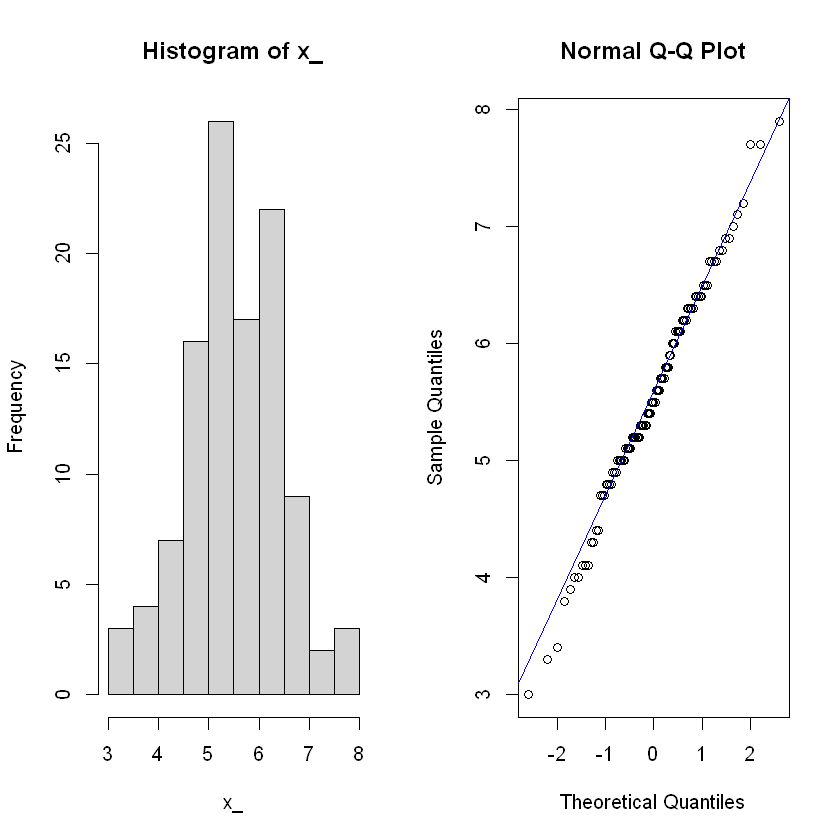

In [75]:
# 정규분포 시각화
par(mfrow=c(1,2)) #행,열
hist(x_)
qqnorm(x_)
qqline(x_,lty=1,col='blue')

- 모집단에서 추출한 표본 데이터의 분포 형태가 정규분포 형태를 가지기 때문에 T-검정을 통해 평균차이 검정을 수행해보자

In [78]:
# 단일 표본평균 차이 검정
# 양측 검정, x_객체와 기존 모집단의 평균 5.2시간 비교
t.test(x_,mu=5.2)


	One Sample t-test

data:  x_
t = 3.9461, df = 108, p-value = 0.0001417
alternative hypothesis: true mean is not equal to 5.2
95 percent confidence interval:
 5.377613 5.736148
sample estimates:
mean of x 
 5.556881 


In [79]:
t.test(x_,mu=5.2,alter='two.side',conf.level=0.95)


	One Sample t-test

data:  x_
t = 3.9461, df = 108, p-value = 0.0001417
alternative hypothesis: true mean is not equal to 5.2
95 percent confidence interval:
 5.377613 5.736148
sample estimates:
mean of x 
 5.556881 


- ~위 둘다 양측검정인 것으로 보임....~
- 유의확률은 유의수준보다 작기 때문에, 국내에서 생산된 노트북과 A사에서 생산된 노트북의 평균 사용시간에 차이가 있다고 볼 수 있다. 

In [80]:
# 방향성을 갖는 단측 가설 검정
t.test(x_,mu=5.2,alter='greater',conf.level = .95)


	One Sample t-test

data:  x_
t = 3.9461, df = 108, p-value = 7.083e-05
alternative hypothesis: true mean is greater than 5.2
95 percent confidence interval:
 5.406833      Inf
sample estimates:
mean of x 
 5.556881 


- A사에서 생산된 노트북의 평균 사용시간이 더 길다는 방향성을 갖는 연구가설을 검정한 결과 p-value 값은 유의수준보다 매우 작기 때문에(차이가 없다라는 귀무가설을 기각하고) A사에서 생산된 노트북의 평균 사용시간이 국내에서 생산된 노브툭 평균 사용시간보다 길다고 할 수 있다.

In [81]:
# qt() 함수를 이용하면 귀무가설의 임계값을 확인할 수 있다. 
qt(7.083e-05, 108) # p-value,df

[1] -3.946073

- T-검정 통계량이 3.946 이상이면 귀무가설을 기각할 수 있다.